# Supervised classification of a satellite image time series



##  Single date training

The single date training can be achieved with the following command line:

In [332]:
! otbcli_TrainImagesClassifier -io.il WorkshopData/classification/images/20160607_T31TCJ_ROI_20m.tif \
    -io.vd WorkshopData/classification/references/training/training.shp \
    -io.out model.rf \
    -sample.vfn CODE -classifier rf \
    -classifier.rf.nbtrees 50 -classifier.rf.max 20 \
    -classifier.rf.cat 13

2022-06-23 11:08:08 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:08:08 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:08:08 (INFO): OTB will use at most 8 threads
2022-06-23 11:08:08 (INFO): No kwl metadata found in file WorkshopData/classification/images/20160607_T31TCJ_ROI_20m.tif
2022-06-23 11:08:08 (INFO): Polygon analysis...
2022-06-23 11:08:08 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 11:08:08 (INFO): Estimated memory for full processing: 1072.5MB (avail.: 128 MB), optimal image partitioning: 9 blocks
2022-06-23 11:08:08 (INFO): Estimation will be performed in 10 blocks of 3750x376 pixels
Analyze polygons...: 100% [**************************************************] (1 seconds)
2022-06-23 11:08:10 (INFO): Sampling rates...
2022-06-23 11:08:10 (INFO): Sampling strategy : fit the number of samples based on the smallest class
2022-06-23 11:08:10 (INFO): Sampling rates for image 1 :  className  requiredSamples  

The displayed performance is rather optimistic, since the samples used to estimate it comes from the
same polygons as for the training. To obtain a more realistic evaluation of performances, it is better to
select a dedicated polygon set for validation.

In [334]:
!otbcli_TrainImagesClassifier -io.il WorkshopData/classification/images/20160607_T31TCJ_ROI_20m.tif \
    -io.vd WorkshopData/classification/references/training/training.shp \
    -io.valid WorkshopData/classification/references/testing/testing.shp \
    -io.out model.rf \
    -sample.vfn CODE -classifier rf \
    -classifier.rf.nbtrees 50 -classifier.rf.max 20 \
    -classifier.rf.cat 13

2022-06-23 11:11:28 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:11:28 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:11:28 (INFO): OTB will use at most 8 threads
2022-06-23 11:11:28 (INFO): No kwl metadata found in file WorkshopData/classification/images/20160607_T31TCJ_ROI_20m.tif
2022-06-23 11:11:28 (INFO): Polygon analysis...
2022-06-23 11:11:28 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 11:11:28 (INFO): Estimated memory for full processing: 1072.5MB (avail.: 128 MB), optimal image partitioning: 9 blocks
2022-06-23 11:11:28 (INFO): Estimation will be performed in 10 blocks of 3750x376 pixels
Analyze polygons...: 100% [**************************************************] (1 seconds)
2022-06-23 11:11:30 (INFO): Sampling rates...
2022-06-23 11:11:30 (INFO): Sampling strategy : fit the number of samples based on the smallest class
2022-06-23 11:11:30 (INFO): Sampling rates for image 1 :  className  requiredSamples  

If the cleanup option is deactivated by adding -cleanup 0 parameter, the application does not
erase temporary outputs.

The following XML files contain the statistics of available samples for each class, for training and
validation set:

* model.rf_statsTrain_1.xml
* model.rf_statsValid_1.xml

The following shapefile files contain the samples used for training and for validation:

* model.rf_samplesTrain_1.shp
* model.rf_samplesValid_1.shp

Those files contain points corresponding to selected samples within the training and validation polygons. Each point has a set of fields corresponding to the radiometric measurement at the point location in the image. Those two files can be displayed in a GIS.


## Spot the date with the best performance

The following command line allows to do the training for each date:

In [336]:
!for f in WorkshopData/classification/images/*.tif; do echo $f; \
    otbcli_TrainImagesClassifier -io.il $f \
    -io.vd WorkshopData/classification/references/training/training.shp \
    -io.valid WorkshopData/classification/references/testing/testing.shp \
    -sample.vfn CODE -classifier rf \
    -classifier.rf.nbtrees 50 -classifier.rf.max 20 \
    -classifier.rf.cat 13 -io.out model.rf | grep Kappa; done

WorkshopData/classification/images/20160607_T31TCJ_ROI_20m.tif
2022-06-23 11:16:28 (INFO): Global performance, Kappa index: 0.605894
WorkshopData/classification/images/20160707_T31TCJ_ROI_20m.tif
2022-06-23 11:16:40 (INFO): Global performance, Kappa index: 0.620234
WorkshopData/classification/images/20160806_T31TCJ_ROI_20m.tif
2022-06-23 11:16:53 (INFO): Global performance, Kappa index: 0.593302
WorkshopData/classification/images/20160905_T31TCJ_ROI_20m.tif
2022-06-23 11:17:05 (INFO): Global performance, Kappa index: 0.612102
WorkshopData/classification/images/20161005_T31TCJ_ROI_20m.tif
2022-06-23 11:17:17 (INFO): Global performance, Kappa index: 0.624169


Kappa coefficients for each date can be retrieved from the output:

| Date | Kappa |
|------|-------|
| 2016-06-07     |  0.605894     |
| 2016-07-07     |  0.620234     |
| 2016-08-06     |  0.593302     |
| 2016-09-05     |  0.612102     |
| 2016-10-05     |  0.624169     |

We can see that the coefficient does not vary much, but that the `2016-10-05` date has slightly better performances.

## Classifying and producing a colored classification map

To perform the classification, we use the `model.rf` file learnt on date `2016-10-05``, and use the following command line:

In [337]:
!otbcli_ImageClassifier -in WorkshopData/classification/images/20161005_T31TCJ_ROI_20m.tif \
    -out classif_20161005.tif uint8 \
    -model model.rf

2022-06-23 11:22:13 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:22:13 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:22:13 (INFO): OTB will use at most 8 threads
2022-06-23 11:22:13 (INFO): No kwl metadata found in file WorkshopData/classification/images/20161005_T31TCJ_ROI_20m.tif
2022-06-23 11:22:13 (INFO): Loading model
2022-06-23 11:22:13 (INFO): Model loaded
2022-06-23 11:22:13 (INFO): Input image normalization deactivated.
2022-06-23 11:22:13 (INFO): Estimated memory for full processing: 724.187MB (avail.: 128 MB), optimal image partitioning: 6 blocks
2022-06-23 11:22:13 (INFO): File classif_20161005.tif will be written in 7 blocks of 3750x536 pixels
Writing classif_20161005.tif...: 100% [**************************************************] (34 seconds)


The `classif_20161005.tif` contains for each pixel the label of the class which has been assigned
to it. In ordered to ease the visualisation of the classification result, we can transform this image by setting
a different color for each class, using the **ColorMapping** application:

In [339]:
!otbcli_ColorMapping -in classif_20161005.tif \
    -out classif_20161005_rgb.tif uint8 \
    -method custom -method.custom.lut \
    WorkshopData/classification/support/color_map.txt

2022-06-23 11:24:06 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:24:06 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:24:06 (INFO): OTB will use at most 8 threads
2022-06-23 11:24:06 (INFO): Color mapping with custom labeled look-up table
2022-06-23 11:24:06 (INFO): No kwl metadata found in file classif_20161005.tif
2022-06-23 11:24:06 (INFO): Parsing color map file WorkshopData/classification/support/color_map.txt.

2022-06-23 11:24:06 (INFO): Adding color mapping 10 -> [218 165 32 ]

2022-06-23 11:24:06 (INFO): Adding color mapping 31 -> [158 211 82 ]

2022-06-23 11:24:06 (INFO): Adding color mapping 32 -> [128 211 82 ]

2022-06-23 11:24:06 (INFO): Adding color mapping 34 -> [97 211 82 ]

2022-06-23 11:24:06 (INFO): Adding color mapping 36 -> [82 211 97 ]

2022-06-23 11:24:06 (INFO): Adding color mapping 41 -> [160 87 60 ]

2022-06-23 11:24:06 (INFO): Adding color mapping 42 -> [210 105 32 ]

2022-06-23 11:24:06 (INFO): Adding color mapping 43 -> [169 169 169 ]

Another way of displaying the `classif_20161005.tif` results is to open it in QGIS and use the style file provided in `support/classif.qml`.

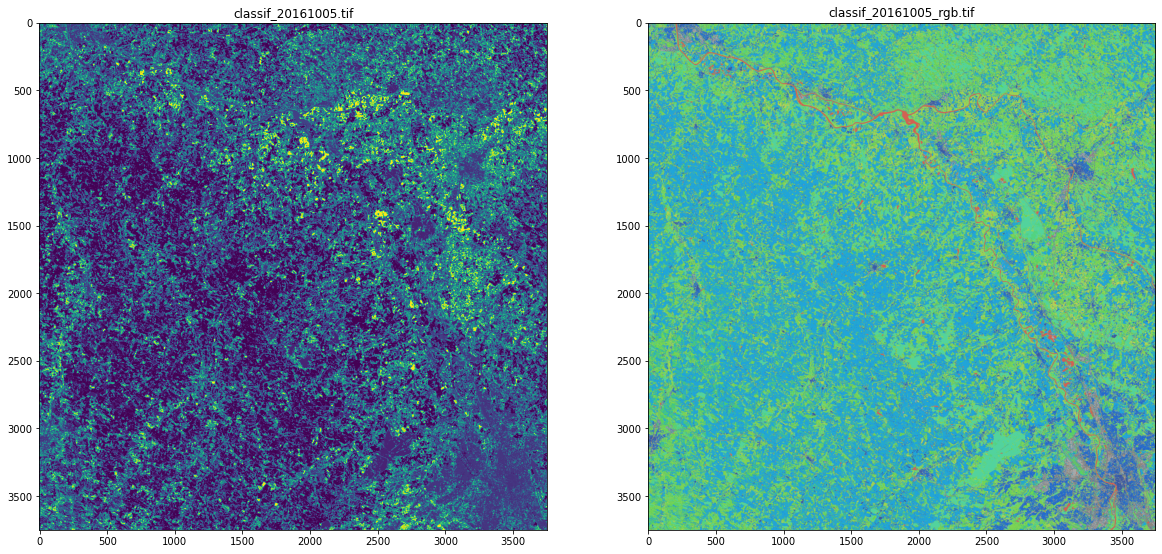

In [342]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 2
rows = 1
tiffs=["classif_20161005.tif","classif_20161005_rgb.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()

## Evaluate global performance

To evaluate global performance over the whole validation set, one can use the **ComputeConfusionMatrix**
application. This application allows to evaluate any classification map (for instance one that have been
post-processed). Beware not to use as input the colored map created during previous step, which is only to
be used for visualization purposes.

In [344]:
!otbcli_ComputeConfusionMatrix -in classif_20161005.tif -ref vector \
    -ref.vector.in WorkshopData/classification/references/testing/testing.shp \
    -out confusion_20161005.csv \
    -ref.vector.field CODE

2022-06-23 11:31:31 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:31:31 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:31:31 (INFO): OTB will use at most 8 threads
2022-06-23 11:31:31 (INFO): No kwl metadata found in file classif_20161005.tif
2022-06-23 11:31:31 (INFO): Estimated memory for full processing: 214.539MB (avail.: 128 MB), optimal image partitioning: 2 blocks
2022-06-23 11:31:31 (INFO): Number of stream divisions : 3
2022-06-23 11:31:32 (INFO): mapOfClassesRef[10] = 0
2022-06-23 11:31:32 (INFO): mapOfClassesRef[31] = 1
2022-06-23 11:31:32 (INFO): mapOfClassesRef[32] = 2
2022-06-23 11:31:32 (INFO): mapOfClassesRef[34] = 3
2022-06-23 11:31:32 (INFO): mapOfClassesRef[36] = 4
2022-06-23 11:31:32 (INFO): mapOfClassesRef[41] = 5
2022-06-23 11:31:32 (INFO): mapOfClassesRef[42] = 6
2022-06-23 11:31:32 (INFO): mapOfClassesRef[43] = 7
2022-06-23 11:31:32 (INFO): mapOfClassesRef[44] = 8
2022-06-23 11:31:32 (INFO): mapOfClassesRef[51] = 9
2022-06-23 11:31:32 (INFO

One can note two things:
    
* First global performance is slightly better than the performance assessed during training. This comes
from the fact that during the training step, we use the same number of samples for all classes, whereas
when using the **ComputeConfusionMatrix**, all available samples are used. Some classes both have
more available samples and are more easy to classify (such as class 51: water), and are therefore
improving performances.
* Second, the annual crops class exhibit a lot of confusion with all other classes. It has a recall of 0.75
and a precision of 0.97. This means that if 97% of pixels identified as annul crops really belong to
this class, 25% of pixel that belong to this class according to the reference validation set have been
misclassified. We will see in last section that adding multi-temporal information in the classification
allows to increase this performance.

## Classification map regularization

To regularize the classification map using a majority voting algorithm, one can use the following command line

In [347]:
! otbcli_ClassificationMapRegularization -ip.radius 1 -ip.suvbool 0 \
    -io.in classif_20161005.tif \
    -io.out classif_20161005_reg.tif uint8

2022-06-23 11:33:00 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:33:00 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:33:00 (INFO): OTB will use at most 8 threads
2022-06-23 11:33:00 (INFO): No kwl metadata found in file classif_20161005.tif
2022-06-23 11:33:00 (INFO): Estimated memory for full processing: 81.5403MB (avail.: 128 MB), optimal image partitioning: 1 blocks
2022-06-23 11:33:00 (INFO): File classif_20161005_reg.tif will be written in 1 blocks of 3750x3750 pixels
Writing classif_20161005_reg.tif...: 100% [**************************************************] (1 seconds)


After regularization, we can evaluate the performances of the new classification map

In [348]:
!otbcli_ComputeConfusionMatrix -in classif_20161005_reg.tif -ref vector \
    -ref.vector.in WorkshopData/classification/references/testing/testing.shp \
    -out confusion_20161005_reg.csv \
    -ref.vector.field CODE

2022-06-23 11:33:51 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:33:51 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:33:51 (INFO): OTB will use at most 8 threads
2022-06-23 11:33:51 (INFO): No kwl metadata found in file classif_20161005_reg.tif
2022-06-23 11:33:51 (INFO): Estimated memory for full processing: 214.539MB (avail.: 128 MB), optimal image partitioning: 2 blocks
2022-06-23 11:33:51 (INFO): Number of stream divisions : 3
2022-06-23 11:33:52 (INFO): mapOfClassesRef[10] = 0
2022-06-23 11:33:52 (INFO): mapOfClassesRef[31] = 1
2022-06-23 11:33:52 (INFO): mapOfClassesRef[32] = 2
2022-06-23 11:33:52 (INFO): mapOfClassesRef[34] = 3
2022-06-23 11:33:52 (INFO): mapOfClassesRef[36] = 4
2022-06-23 11:33:52 (INFO): mapOfClassesRef[41] = 5
2022-06-23 11:33:52 (INFO): mapOfClassesRef[42] = 6
2022-06-23 11:33:52 (INFO): mapOfClassesRef[43] = 7
2022-06-23 11:33:52 (INFO): mapOfClassesRef[44] = 8
2022-06-23 11:33:52 (INFO): mapOfClassesRef[51] = 9
2022-06-23 11:33:52 (

Regularization improves significantly the classification map performance. This is due to the fact that
reference data are rather regular, and applying this processing makes the classification map look more like
the reference data.

## Classification with multiple dates

Lets replay the different step with all the dates altogether:

First, training

In [349]:
!otbcli_TrainImagesClassifier -io.il WorkshopData/classification/images/all.vrt \
    -io.vd WorkshopData/classification/references/training/training.shp \
    -io.valid WorkshopData/classification/references/testing/testing.shp \
    -io.out model_all.rf \
    -sample.vfn CODE -classifier rf \
    -classifier.rf.nbtrees 50 -classifier.rf.max 20 \
    -classifier.rf.cat 13

2022-06-23 11:35:17 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:35:17 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:35:17 (INFO): OTB will use at most 8 threads
2022-06-23 11:35:17 (INFO): No kwl metadata found in file WorkshopData/classification/images/all.vrt
2022-06-23 11:35:17 (INFO): Polygon analysis...
2022-06-23 11:35:17 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 11:35:17 (INFO): Estimated memory for full processing: 5362.51MB (avail.: 128 MB), optimal image partitioning: 42 blocks
2022-06-23 11:35:17 (INFO): Estimation will be performed in 36 blocks of 640x640 pixels
Analyze polygons...: 100% [**************************************************] (2 seconds)
2022-06-23 11:35:20 (INFO): Sampling rates...
2022-06-23 11:35:20 (INFO): Sampling strategy : fit the number of samples based on the smallest class
2022-06-23 11:35:20 (INFO): Sampling rates for image 1 :  className  requiredSamples  totalSamples  rate


Then, classification

In [350]:
!otbcli_ImageClassifier -in WorkshopData/classification/images/all.vrt \
    -out classif_all.tif uint8 \
    -model model_all.rf

2022-06-23 11:36:22 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:36:22 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:36:22 (INFO): OTB will use at most 8 threads
2022-06-23 11:36:22 (INFO): No kwl metadata found in file WorkshopData/classification/images/all.vrt
2022-06-23 11:36:22 (INFO): Loading model
2022-06-23 11:36:23 (INFO): Model loaded
2022-06-23 11:36:23 (INFO): Input image normalization deactivated.
2022-06-23 11:36:23 (INFO): Estimated memory for full processing: 2869.95MB (avail.: 128 MB), optimal image partitioning: 23 blocks
2022-06-23 11:36:23 (INFO): File classif_all.tif will be written in 25 blocks of 896x768 pixels
Writing classif_all.tif...: 100% [**************************************************] (38 seconds)


Next, regularisation

In [351]:
!otbcli_ClassificationMapRegularization -ip.radius 1 -ip.suvbool 0 \
    -io.in classif_all.tif \
    -io.out classif_all_reg.tif uint8

2022-06-23 11:37:19 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:37:19 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:37:19 (INFO): OTB will use at most 8 threads
2022-06-23 11:37:19 (INFO): No kwl metadata found in file classif_all.tif
2022-06-23 11:37:19 (INFO): Estimated memory for full processing: 81.5403MB (avail.: 128 MB), optimal image partitioning: 1 blocks
2022-06-23 11:37:19 (INFO): File classif_all_reg.tif will be written in 1 blocks of 3750x3750 pixels
Writing classif_all_reg.tif...: 100% [**************************************************] (1 seconds)


Finally, evaluation of performances

In [353]:
!otbcli_ComputeConfusionMatrix -in classif_all_reg.tif -ref vector \
    -ref.vector.in WorkshopData/classification/references/testing/testing.shp \
    -out confusion_all_reg.csv \
    -ref.vector.field CODE

2022-06-23 11:37:57 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:37:57 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:37:57 (INFO): OTB will use at most 8 threads
2022-06-23 11:37:57 (INFO): No kwl metadata found in file classif_all_reg.tif
2022-06-23 11:37:57 (INFO): Estimated memory for full processing: 214.539MB (avail.: 128 MB), optimal image partitioning: 2 blocks
2022-06-23 11:37:57 (INFO): Number of stream divisions : 3
2022-06-23 11:37:58 (INFO): mapOfClassesRef[10] = 0
2022-06-23 11:37:58 (INFO): mapOfClassesRef[31] = 1
2022-06-23 11:37:58 (INFO): mapOfClassesRef[32] = 2
2022-06-23 11:37:58 (INFO): mapOfClassesRef[34] = 3
2022-06-23 11:37:58 (INFO): mapOfClassesRef[36] = 4
2022-06-23 11:37:58 (INFO): mapOfClassesRef[41] = 5
2022-06-23 11:37:58 (INFO): mapOfClassesRef[42] = 6
2022-06-23 11:37:58 (INFO): mapOfClassesRef[43] = 7
2022-06-23 11:37:58 (INFO): mapOfClassesRef[44] = 8
2022-06-23 11:37:58 (INFO): mapOfClassesRef[51] = 9
2022-06-23 11:37:58 (INFO)

Adding multi-temporal information in classification result in a significant performance improvement.
One can note that recall of the annual crops class has raised to 93%, which means that now 93% of this
class in the ground truth are correctly classified. This improvement was expected since crop classes usually
have a strong temporal signature with respect to other classes.

Finally, we can generate the color classification map

In [354]:
!otbcli_ColorMapping -in classif_all_reg.tif \
    -out classif_all_reg_rgb.tif uint8 \
    -method custom -method.custom.lut \
    WorkshopData/classification/support/color_map.txt

2022-06-23 11:38:39 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 11:38:39 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 11:38:39 (INFO): OTB will use at most 8 threads
2022-06-23 11:38:39 (INFO): Color mapping with custom labeled look-up table
2022-06-23 11:38:39 (INFO): No kwl metadata found in file classif_all_reg.tif
2022-06-23 11:38:39 (INFO): Parsing color map file WorkshopData/classification/support/color_map.txt.

2022-06-23 11:38:39 (INFO): Adding color mapping 10 -> [218 165 32 ]

2022-06-23 11:38:39 (INFO): Adding color mapping 31 -> [158 211 82 ]

2022-06-23 11:38:39 (INFO): Adding color mapping 32 -> [128 211 82 ]

2022-06-23 11:38:39 (INFO): Adding color mapping 34 -> [97 211 82 ]

2022-06-23 11:38:39 (INFO): Adding color mapping 36 -> [82 211 97 ]

2022-06-23 11:38:39 (INFO): Adding color mapping 41 -> [160 87 60 ]

2022-06-23 11:38:39 (INFO): Adding color mapping 42 -> [210 105 32 ]

2022-06-23 11:38:39 (INFO): Adding color mapping 43 -> [169 169 169 ]


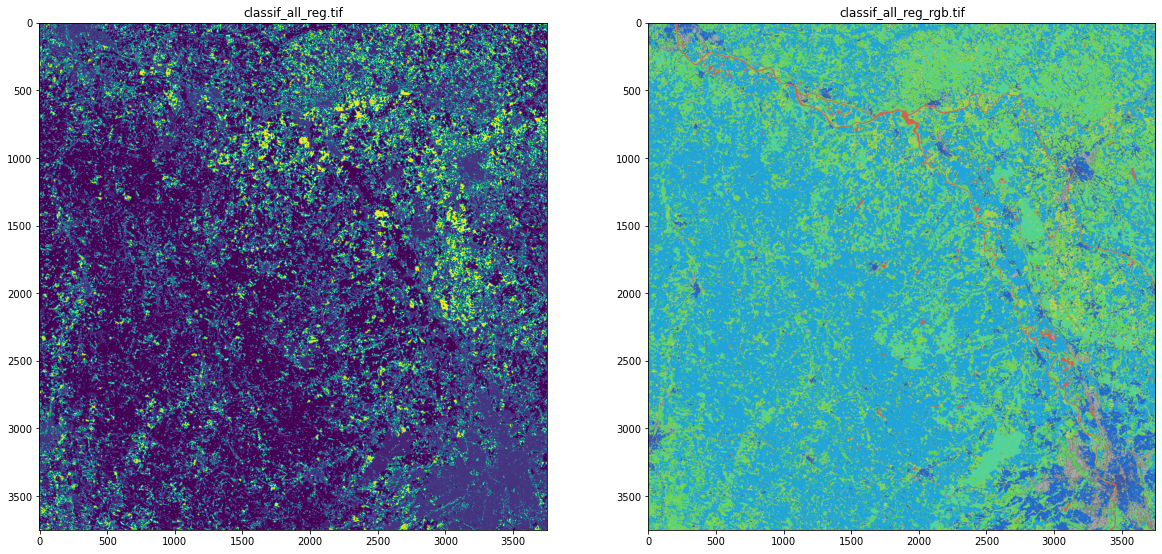

In [355]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 2
rows = 1
tiffs=["classif_all_reg.tif","classif_all_reg_rgb.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()